# Introduction to Scikit Learn library

In [1]:
import github_command as gt

In [95]:
gt.push(file_to_transfer="TD4_Sklearn.ipynb", message="Corrected Bootstrap", repos="TDs_ESILV")

In [94]:
gt.push(file_to_transfer="td4_ressources/", message="Added Biais-Variance trade-off", repos="TDs_ESILV")

In [3]:
gt.push(file_to_transfer="READMe.md", message="added image from Boostrap results", repos="TDs_ESILV")

## Import du dataset

In [4]:
import numpy as np

In [5]:
from sklearn import datasets

In [6]:
boston = datasets.load_boston()

In [7]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [8]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

discussion sur des critères discriminatoires : https://mail.python.org/pipermail/scikit-learn/2017-July/001683.html

## Récupérer x et y

In [9]:
X = boston.data

In [10]:
y = boston.target

In [11]:
X.shape, y.shape

((506, 13), (506,))

## Diviser en jeu de test et apprentissage

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234)

In [98]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

On retrouve bien le splitage ratio

In [99]:
[tuple_[0]/X.shape[0] for tuple_ in (X_train.shape, X_test.shape, y_train.shape, y_test.shape)]

[0.7490118577075099,
 0.2509881422924901,
 0.7490118577075099,
 0.2509881422924901]

## Utilisation d'un modèle simplement

In [100]:
performances = dict()

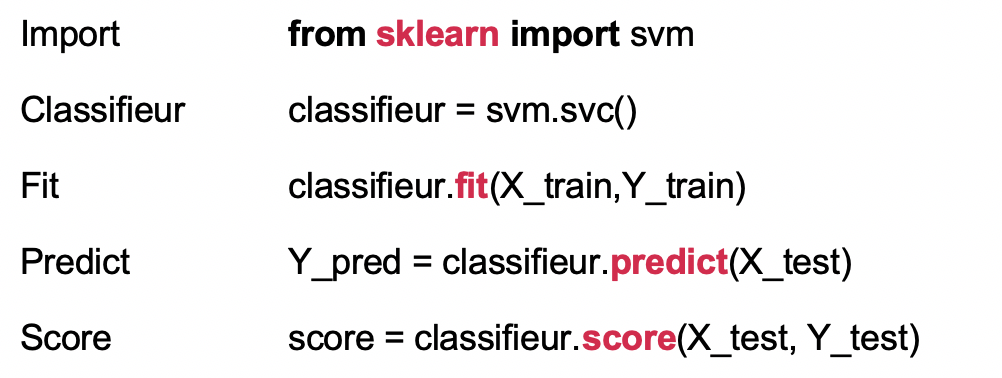

In [101]:
from IPython.display import Image
Image(filename="td4_ressources/img_sklearn.png", retina = True)

In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
algorithme = LinearRegression()
algorithme.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [104]:
algorithme.score(X_test, y_test)

0.7323523347366852

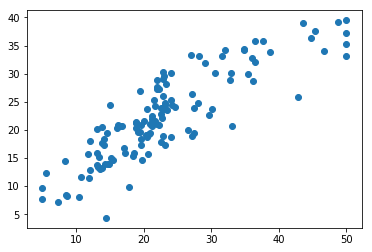

In [105]:
## Predictions against True values
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x=y_test, y=algorithme.predict(X_test))

In [106]:
algorithme.coef_

array([-9.66378735e-02,  6.31080432e-02, -1.38069045e-02,  2.84516261e+00,
       -2.19347661e+01,  2.40835980e+00,  2.45246610e-03, -1.89020994e+00,
        3.56217021e-01, -1.27942145e-02, -1.05991197e+00,  1.02040679e-02,
       -5.63773228e-01])

In [107]:
performances[algorithme] = algorithme.score(X_test, y_test)

But train/test split does have its dangers — what if the split we make isn’t random? 

Instead of algo1 we can use directly LinearRegression() as it will fit it anyway on the different splits

## Mettre tout ceci sous forme d'une fonction

In [117]:
def get_score(algorithme, X_train, X_test, y_train, y_test, display_graph=False, display_options=True):
    if display_options:
        print("fitting :\n"+ str(algorithme))
        print("X_train:{} , X_test:{} ,  y_train:{} ,  y_test:{}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))
    modele = algorithme.fit(X_train, y_train)
    score  = modele.score(X_test, y_test)
    if display_graph:
        import matplotlib.pyplot as plt
        plt.scatter(x=y_test, y=algorithme.predict(X_test)) ## Predictions against True values
    return score

In [118]:
get_score(LinearRegression(), *train_test_split(X, y, random_state=1234))

fitting :
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
X_train:(379, 13) , X_test:(127, 13) ,  y_train:(379,) ,  y_test:(127,)


0.7323523347366852

## Avons-nous besoin de Standardizer les valeurs ? 

In [115]:
from sklearn.preprocessing import StandardScaler
scaler   = StandardScaler().fit(X_train)
X_train  = scaler.transform(X_train)
X_test   = scaler.transform(X_test)

In [116]:
get_score(LinearRegression(), X_train, X_test, y_train, y_test)

fitting :
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
X_train:(379, 13) , X_test:(127, 13) ,  y_train:(379,) ,  y_test:(127,)
[-0.80040389  1.43722671 -0.09355308  0.73184835 -2.53389473  1.63213
  0.06733701 -3.68983955  3.10132529 -2.17039116 -2.28262926  0.96734869
 -3.98258154]


0.7323523347366848

Pour une régression linéaire non. Expliquer pourquoi.

Mais c'est toujours mieux de le faire. Expliquer pourquoi.

## Cross validation

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

### CV parametre = nombre de folds

In [29]:
results = cross_val_score(LinearRegression(), X, y, cv=3)
display(results, results.mean(), results.std())

array([ 0.5828011 ,  0.53193819, -5.85104986])

-1.5787701857180003

3.021029289219623

In [30]:
results = cross_val_score(LinearRegression(), X, y, cv=5)
display(results, results.mean(), results.std())

array([ 0.63861069,  0.71334432,  0.58645134,  0.07842495, -0.26312455])

0.35074135093252234

0.3797094749826804

### Attention à randomly select les données !

In [31]:
random_indexes = np.random.choice(range(0,np.size(X, axis=0)),size=np.size(X, axis=0),replace=False)
results = cross_val_score(LinearRegression(), 
                X[random_indexes,:],
                y[random_indexes],
                cv=5)
display(results, results.mean(), results.std())

array([0.68512576, 0.70717254, 0.77932804, 0.7208155 , 0.74135953])

0.7267602733977567

0.03202799075782555

#### mieux :

In [32]:
results = cross_val_score(LinearRegression(), X, y, cv=KFold(shuffle=True, n_splits=5))
display(results, results.mean(), results.std())

array([0.79220036, 0.69498963, 0.72775639, 0.71402455, 0.66805757])

0.7194057020864024

0.04154642728328833

In [136]:
def multiple_cross_val_scores(algorithme, X, y):
    import numpy as np
    results=dict()
    for kfold in range(3,100, 20):
        score = cross_val_score(algorithme, X, y,  cv = KFold(shuffle=True, n_splits=kfold), scoring='r2')
        results[kfold] = score.mean(), score.std()
    return results

In [137]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
test = multiple_cross_val_scores(DecisionTreeRegressor(),X, y)
test = pd.DataFrame(test, index=["mean", "std"]).T
test

,mean,std
3,0.798677,0.038122
23,0.744383,0.228584
43,0.697315,0.300587
63,0.625052,0.520391
83,0.553085,0.659328


In [138]:
new_index = [str(x) + " folds" for x in test.index]
test.index = new_index

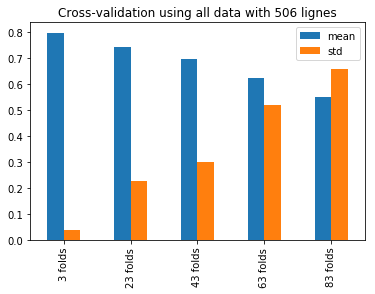

In [139]:
test.plot(kind='bar', title='Cross-validation using all data with {} lignes'.format(X.shape[0]))

There are cases where the computational definition of R2 can yield negative values, depending on the definition used. This can arise when the predictions that are being compared to the corresponding outcomes have not been derived from a model-fitting procedure using those data. Even if a model-fitting procedure has been used, R2 may still be negative, for example when linear regression is conducted without including an intercept, or when a non-linear function is used to fit the data. In cases where negative values arise, the mean of the data provides a better fit to the outcomes than do the fitted function values, according to this particular criterion.

The constant minimizing the squared error is the mean. Since you are doing cross validation with left out data, **it can happen that the mean of your test set is wildly different from the mean of your training set**

R² = 1 - RSS / TSS, where RSS is the residual sum of squares ∑(y - f(x))² and TSS is the total sum of squares ∑(y - mean(y))². Now for R² ≥ -1, it is required that RSS/TSS ≤ 2, but it's easy to construct a model and dataset for which this is not true:

***Inspect shuffling first ! If data is sorted at first !!! *** 

### Decision Tree Regressor

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
algorithme = DecisionTreeRegressor()
algorithme.fit(X_train, y_train)
score = algorithme.score(X_test, y_test)
performances[algorithme] = score

### Random Forest example

In [39]:
from sklearn.ensemble import RandomForestRegressor
hyperparametres = { 'n_estimators':30 }
algorithme = RandomForestRegressor(**hyperparametres)
score = get_score(algorithme, X_train, X_test, y_train, y_test)
performances[algorithme] = score

fitting :
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
X_train:(379, 13) , X_test:(127, 13) ,  y_train:(379,) ,  y_test:(127,)


/Users/lucbertin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [40]:
hyperparametres = {"n_estimators"  :  30, "max_features"  :  3, "max_depth"     :  50,}
algorithme = RandomForestRegressor(**hyperparametres)
score = get_score(algorithme, X_train, X_test, y_train, y_test)
performances[algorithme] = score

fitting :
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
X_train:(379, 13) , X_test:(127, 13) ,  y_train:(379,) ,  y_test:(127,)


### ExtraTreesRegressor

In [41]:
from sklearn.ensemble import ExtraTreesRegressor

algorithme = ExtraTreesRegressor()
score      = get_score(algorithme, X_train, X_test, y_train, y_test)
performances[algorithme] = score

fitting :
ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)
X_train:(379, 13) , X_test:(127, 13) ,  y_train:(379,) ,  y_test:(127,)


utiliser n_jobs = -1 c'est mieux pour paralléliser quand on a plusieurs CPUs

### SVR 

In [42]:
from sklearn import svm
algorithme = svm.SVR(kernel='linear')
score      = get_score(algorithme, X_train, X_test, y_train, y_test)
performances[algorithme] = score
print(score)

fitting :
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
X_train:(379, 13) , X_test:(127, 13) ,  y_train:(379,) ,  y_test:(127,)
0.7463047645787173


### catboost

installation : !pip install catboost

In [43]:
from catboost import CatBoostRegressor

In [44]:
algorithme = CatBoostRegressor(task_type="CPU")
modele     = algorithme.fit(X_train, y_train)
score      = algorithme.score(X_test, y_test)
performances['catboost'] = score

0:	learn: 8.7204719	total: 70.3ms	remaining: 1m 10s
1:	learn: 8.5935783	total: 78.5ms	remaining: 39.2s
2:	learn: 8.4557656	total: 86.1ms	remaining: 28.6s
3:	learn: 8.3357630	total: 93.9ms	remaining: 23.4s
4:	learn: 8.2465306	total: 103ms	remaining: 20.4s
5:	learn: 8.1042568	total: 111ms	remaining: 18.5s
6:	learn: 7.9615200	total: 120ms	remaining: 17s
7:	learn: 7.8307277	total: 130ms	remaining: 16.1s
8:	learn: 7.7104981	total: 142ms	remaining: 15.7s
9:	learn: 7.5944429	total: 155ms	remaining: 15.3s
10:	learn: 7.4960127	total: 165ms	remaining: 14.8s
11:	learn: 7.3870638	total: 173ms	remaining: 14.2s
12:	learn: 7.2733017	total: 186ms	remaining: 14.1s
13:	learn: 7.1945331	total: 196ms	remaining: 13.8s
14:	learn: 7.0865563	total: 205ms	remaining: 13.5s
15:	learn: 6.9746485	total: 220ms	remaining: 13.5s
16:	learn: 6.8940218	total: 231ms	remaining: 13.4s
17:	learn: 6.8365102	total: 241ms	remaining: 13.2s
18:	learn: 6.7667920	total: 253ms	remaining: 13.1s
19:	learn: 6.6802493	total: 264ms	rema

168:	learn: 2.6259732	total: 1.65s	remaining: 8.1s
169:	learn: 2.6144806	total: 1.66s	remaining: 8.1s
170:	learn: 2.6073851	total: 1.67s	remaining: 8.09s
171:	learn: 2.5985368	total: 1.68s	remaining: 8.07s
172:	learn: 2.5947585	total: 1.69s	remaining: 8.07s
173:	learn: 2.5882597	total: 1.7s	remaining: 8.05s
174:	learn: 2.5734787	total: 1.71s	remaining: 8.05s
175:	learn: 2.5626087	total: 1.71s	remaining: 8.03s
176:	learn: 2.5559951	total: 1.72s	remaining: 8.02s
177:	learn: 2.5502860	total: 1.74s	remaining: 8.02s
178:	learn: 2.5438083	total: 1.75s	remaining: 8.01s
179:	learn: 2.5358585	total: 1.75s	remaining: 7.99s
180:	learn: 2.5301336	total: 1.76s	remaining: 7.97s
181:	learn: 2.5186205	total: 1.77s	remaining: 7.95s
182:	learn: 2.5082795	total: 1.78s	remaining: 7.93s
183:	learn: 2.4971809	total: 1.78s	remaining: 7.91s
184:	learn: 2.4909010	total: 1.79s	remaining: 7.89s
185:	learn: 2.4821878	total: 1.8s	remaining: 7.88s
186:	learn: 2.4750551	total: 1.81s	remaining: 7.86s
187:	learn: 2.46

327:	learn: 1.8640586	total: 3.68s	remaining: 7.55s
328:	learn: 1.8624392	total: 3.7s	remaining: 7.55s
329:	learn: 1.8603490	total: 3.71s	remaining: 7.54s
330:	learn: 1.8560584	total: 3.73s	remaining: 7.54s
331:	learn: 1.8534904	total: 3.75s	remaining: 7.54s
332:	learn: 1.8509906	total: 3.76s	remaining: 7.53s
333:	learn: 1.8497268	total: 3.77s	remaining: 7.53s
334:	learn: 1.8475376	total: 3.79s	remaining: 7.52s
335:	learn: 1.8453399	total: 3.8s	remaining: 7.52s
336:	learn: 1.8427981	total: 3.81s	remaining: 7.5s
337:	learn: 1.8404718	total: 3.82s	remaining: 7.49s
338:	learn: 1.8380019	total: 3.83s	remaining: 7.47s
339:	learn: 1.8364060	total: 3.84s	remaining: 7.46s
340:	learn: 1.8340868	total: 3.85s	remaining: 7.44s
341:	learn: 1.8322113	total: 3.86s	remaining: 7.43s
342:	learn: 1.8295989	total: 3.88s	remaining: 7.42s
343:	learn: 1.8281245	total: 3.89s	remaining: 7.42s
344:	learn: 1.8247145	total: 3.91s	remaining: 7.42s
345:	learn: 1.8223180	total: 3.92s	remaining: 7.42s
346:	learn: 1.8

487:	learn: 1.6051504	total: 5.34s	remaining: 5.6s
488:	learn: 1.6043540	total: 5.35s	remaining: 5.59s
489:	learn: 1.6024268	total: 5.36s	remaining: 5.58s
490:	learn: 1.6012787	total: 5.37s	remaining: 5.57s
491:	learn: 1.5987901	total: 5.38s	remaining: 5.56s
492:	learn: 1.5983267	total: 5.39s	remaining: 5.55s
493:	learn: 1.5974983	total: 5.41s	remaining: 5.54s
494:	learn: 1.5963213	total: 5.42s	remaining: 5.53s
495:	learn: 1.5951684	total: 5.43s	remaining: 5.51s
496:	learn: 1.5945400	total: 5.44s	remaining: 5.5s
497:	learn: 1.5940393	total: 5.45s	remaining: 5.49s
498:	learn: 1.5934209	total: 5.46s	remaining: 5.48s
499:	learn: 1.5924761	total: 5.47s	remaining: 5.47s
500:	learn: 1.5919745	total: 5.48s	remaining: 5.46s
501:	learn: 1.5913030	total: 5.49s	remaining: 5.45s
502:	learn: 1.5901992	total: 5.5s	remaining: 5.44s
503:	learn: 1.5897147	total: 5.51s	remaining: 5.43s
504:	learn: 1.5876846	total: 5.52s	remaining: 5.41s
505:	learn: 1.5857479	total: 5.54s	remaining: 5.4s
506:	learn: 1.58

649:	learn: 1.4545149	total: 7.08s	remaining: 3.81s
650:	learn: 1.4534213	total: 7.1s	remaining: 3.81s
651:	learn: 1.4532087	total: 7.12s	remaining: 3.8s
652:	learn: 1.4529971	total: 7.13s	remaining: 3.79s
653:	learn: 1.4522157	total: 7.15s	remaining: 3.78s
654:	learn: 1.4510228	total: 7.17s	remaining: 3.77s
655:	learn: 1.4493922	total: 7.18s	remaining: 3.77s
656:	learn: 1.4486562	total: 7.2s	remaining: 3.76s
657:	learn: 1.4483659	total: 7.21s	remaining: 3.75s
658:	learn: 1.4477768	total: 7.22s	remaining: 3.73s
659:	learn: 1.4466613	total: 7.23s	remaining: 3.73s
660:	learn: 1.4463816	total: 7.25s	remaining: 3.72s
661:	learn: 1.4451286	total: 7.27s	remaining: 3.71s
662:	learn: 1.4449316	total: 7.28s	remaining: 3.7s
663:	learn: 1.4444313	total: 7.29s	remaining: 3.69s
664:	learn: 1.4442362	total: 7.3s	remaining: 3.68s
665:	learn: 1.4440564	total: 7.32s	remaining: 3.67s
666:	learn: 1.4438680	total: 7.33s	remaining: 3.66s
667:	learn: 1.4430124	total: 7.35s	remaining: 3.65s
668:	learn: 1.442

821:	learn: 1.3624485	total: 9.07s	remaining: 1.97s
822:	learn: 1.3623496	total: 9.09s	remaining: 1.96s
823:	learn: 1.3616673	total: 9.11s	remaining: 1.94s
824:	learn: 1.3609283	total: 9.12s	remaining: 1.93s
825:	learn: 1.3608006	total: 9.13s	remaining: 1.92s
826:	learn: 1.3596348	total: 9.15s	remaining: 1.91s
827:	learn: 1.3589101	total: 9.17s	remaining: 1.9s
828:	learn: 1.3580356	total: 9.18s	remaining: 1.89s
829:	learn: 1.3579285	total: 9.2s	remaining: 1.88s
830:	learn: 1.3574351	total: 9.21s	remaining: 1.87s
831:	learn: 1.3573363	total: 9.23s	remaining: 1.86s
832:	learn: 1.3569433	total: 9.24s	remaining: 1.85s
833:	learn: 1.3561715	total: 9.26s	remaining: 1.84s
834:	learn: 1.3550926	total: 9.27s	remaining: 1.83s
835:	learn: 1.3540832	total: 9.28s	remaining: 1.82s
836:	learn: 1.3539768	total: 9.29s	remaining: 1.81s
837:	learn: 1.3533723	total: 9.3s	remaining: 1.8s
838:	learn: 1.3525411	total: 9.31s	remaining: 1.79s
839:	learn: 1.3517759	total: 9.32s	remaining: 1.77s
840:	learn: 1.35

987:	learn: 1.2869008	total: 10.7s	remaining: 130ms
988:	learn: 1.2865867	total: 10.7s	remaining: 119ms
989:	learn: 1.2863155	total: 10.7s	remaining: 108ms
990:	learn: 1.2858371	total: 10.7s	remaining: 97.2ms
991:	learn: 1.2852698	total: 10.7s	remaining: 86.4ms
992:	learn: 1.2850812	total: 10.7s	remaining: 75.5ms
993:	learn: 1.2842911	total: 10.7s	remaining: 64.7ms
994:	learn: 1.2834866	total: 10.7s	remaining: 53.9ms
995:	learn: 1.2831645	total: 10.7s	remaining: 43.2ms
996:	learn: 1.2823828	total: 10.8s	remaining: 32.4ms
997:	learn: 1.2823285	total: 10.8s	remaining: 21.6ms
998:	learn: 1.2822497	total: 10.8s	remaining: 10.8ms
999:	learn: 1.2815964	total: 10.8s	remaining: 0us


### Simple visualisation des performances des différents algos

In [45]:
from collections import OrderedDict
dico_ordonne = OrderedDict(performances)

import pandas as pd
df = pd.DataFrame()
df["perf"] = dico_ordonne.values()
df["algo"] = dico_ordonne.keys()
df['nom_algo'] = df.algo.apply(lambda algo: str(algo).split('(')[0])
df.set_index('nom_algo', inplace=True)
df

,perf,algo
nom_algo,,
LinearRegression,0.732352,"LinearRegression(copy_X=True, fit_intercept=Tr..."
DecisionTreeRegressor,0.857489,"DecisionTreeRegressor(criterion='mse', max_dep..."
RandomForestRegressor,0.902933,"(DecisionTreeRegressor(criterion='mse', max_de..."
RandomForestRegressor,0.896358,"(DecisionTreeRegressor(criterion='mse', max_de..."
ExtraTreesRegressor,0.908299,"(ExtraTreeRegressor(criterion='mse', max_depth..."
SVR,0.746305,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3..."
catboost,0.911539,catboost


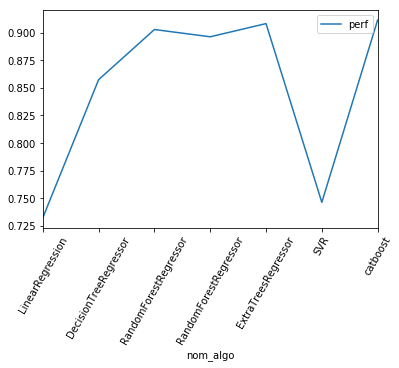

In [46]:
df[["perf"]].plot(kind='line', rot=60)

## Aller au delà des hyperparamètres par défaut d'un modèle avec GridSearch

mieux d'utiliser n_jobs=-1 si plusieurs CPU pour paralléliser

Par défaut scikit-learn optimise les hyperparamètres tout en faisant une **cross-validation**. Sans celle-ci, c’est comme si le modèle optimisait ses coefficients sur la base d’apprentissage et ses hyperparamètres sur la base de test. De ce fait, toutes les données servent à optimiser un paramètre. La cross-validation limite en **vérifiant la stabilité de l’apprentissage sur plusieurs découpages**. On peut également découper en train / test / validation mais cela réduit d’autant le nombre de données pour apprendre.

Stackoverflow : 
- All estimators in scikit where name ends with CV perform cross-validation. But you need to keep a separate test set for measuring the performance.

- So you need to split your whole data to train and test. Forget about this test data for a while.

- And then pass this train data only to grid-search. GridSearch will split this train data further into train and test to tune the hyper-parameters passed to it. And finally fit the model on the whole train data with best found parameters.

- Now you need to test this model on the test data you kept aside in the beginning. This will give you the near real world performance of model.

- If you use the whole data into GridSearchCV, then there would be leakage of test data into parameter tuning and then the final model may not perform that well on newer unseen data.



In [47]:
from sklearn import grid_search

/Users/lucbertin/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/lucbertin/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [48]:
hyperparametres_possibles = {
    'C'     : [0.5, 1, 1.5],
    'gamma' :[0.5, 0.1, 0.15]
}
grid = grid_search.GridSearchCV(estimator=svm.SVR(), 
                                param_grid=hyperparametres_possibles, 
                                n_jobs=-1, cv=10, verbose=2)

### ON ENTRAINE TOUJOURS LA GRILLE SUR LES DONNÉES D'ENTRAINEMENT !

In [49]:
grid.fit(X_train, y_train) 

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] C=0.5, gamma=0.5 ................................................
[CV] C=0.5, gamma=0.5 ................................................
[CV] C=0.5, gamma=0.5 ................................................
[CV] C=0.5, gamma=0.5 ................................................
[CV] C=0.5, gamma=0.5 ................................................
[CV] C=0.5, gamma=0.5 ................................................
[CV] C=0.5, gamma=0.5 ................................................
[CV] ....................................... C=0.5, gamma=0.5 -   0.0s
[CV] C=0.5, gamma=0.5 ................................................
[CV] ....................................... C=0.5, gamma=0.5 -   0.0s
[CV] ....................................... C=0.5, gamma=0.5 -   0.0s
[CV] ....................................... C=0.5, gamma=0.5 -   0.0s
[CV] C=0.5, gamma=0.5 ................................................
[CV] C=0.5, gamm

[CV] C=1.5, gamma=0.5 ................................................
[CV] C=1.5, gamma=0.1 ................................................
[CV] C=1, gamma=0.1 ..................................................
[CV] ....................................... C=1.5, gamma=0.1 -   0.0s
[CV] C=1.5, gamma=0.1 ................................................
[CV] ........................................ C=1, gamma=0.15 -   0.0s
[CV] ........................................ C=1, gamma=0.15 -   0.0s
[CV] C=1, gamma=0.15 .................................................
[CV] C=1, gamma=0.15 .................................................
[CV] ......................................... C=1, gamma=0.1 -   0.0s
[CV] C=1, gamma=0.15 .................................................
[CV] ....................................... C=1.5, gamma=0.5 -   0.0s
[CV] ....................................... C=1.5, gamma=0.5 -   0.0s
[CV] ....................................... C=1.5, gamma=0.5 -   0.0s
[CV] C

[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.6s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.5, 1, 1.5], 'gamma': [0.5, 0.1, 0.15]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [50]:
dir(grid)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_estimator_type',
 '_fit',
 '_get_param_names',
 'best_estimator_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'fit_params',
 'get_params',
 'grid_scores_',
 'iid',
 'inverse_transform',
 'n_jobs',
 'param_grid',
 'pre_dispatch',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'refit',
 'score',
 'scorer_',
 'scoring',
 'set_params',
 'transform',
 'verbose']

In [51]:
grid.grid_scores_

[mean: 0.22374, std: 0.10757, params: {'C': 0.5, 'gamma': 0.5},
 mean: 0.48645, std: 0.12892, params: {'C': 0.5, 'gamma': 0.1},
 mean: 0.43267, std: 0.13127, params: {'C': 0.5, 'gamma': 0.15},
 mean: 0.34845, std: 0.13209, params: {'C': 1, 'gamma': 0.5},
 mean: 0.60342, std: 0.12992, params: {'C': 1, 'gamma': 0.1},
 mean: 0.55903, std: 0.13321, params: {'C': 1, 'gamma': 0.15},
 mean: 0.42076, std: 0.13797, params: {'C': 1.5, 'gamma': 0.5},
 mean: 0.64370, std: 0.12544, params: {'C': 1.5, 'gamma': 0.1},
 mean: 0.60802, std: 0.13092, params: {'C': 1.5, 'gamma': 0.15}]

In [52]:
grid.best_params_

{'C': 1.5, 'gamma': 0.1}

In [53]:
grid.best_estimator_

SVR(C=1.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [54]:
grid.best_score_

0.643695156247268

### on peut alors réutiliser ce best estimator en le réentrainant sur l'ensemble de X_train et pas un subset de X_train 

In [55]:
model = svm.SVR(C=1.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [56]:
model.fit(X_train, y_train)

SVR(C=1.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [57]:
model.score(X_test, y_test)

0.6429232600682278

performance proche du split

### à tâton pour trouver le meilleur modèle 

In [58]:
hyperparametres_possibles = {
    'C'     : [1.5, 2, 2.5],
    'gamma' :[0.01, 0.05, 1]
}
grid = grid_search.GridSearchCV(estimator=svm.SVR(), 
                                param_grid=hyperparametres_possibles, 
                                n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_score_
grid.best_params_

{'C': 2.5, 'gamma': 0.05}

In [59]:
hyperparametres_possibles = {
    'C'     : [2.5, 3, 3.5],
    'gamma' :[0.01, 0.05, 1]
}
grid = grid_search.GridSearchCV(estimator=svm.SVR(), 
                                param_grid=hyperparametres_possibles, 
                                n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_score_
grid.best_params_

{'C': 3.5, 'gamma': 0.05}

In [60]:
hyperparametres_possibles = {
    'C'     : [3.5, 4, 5, 6],
    'gamma' :[0.01, 0.05, 1]
}
grid = grid_search.GridSearchCV(estimator=svm.SVR(), 
                                param_grid=hyperparametres_possibles, 
                                n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_score_, grid.best_params_

(0.7501429622074626, {'C': 6, 'gamma': 0.05})

In [61]:
hyperparametres_possibles = {
    'C'     : [ 6, 8, 10],
    'gamma' :[0.01, 0.05, 1]
}
grid = grid_search.GridSearchCV(estimator=svm.SVR(), 
                                param_grid=hyperparametres_possibles, 
                                n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_score_, grid.best_params_

(0.7741648460590741, {'C': 10, 'gamma': 0.05})

In [62]:
hyperparametres_possibles = {
    'C'     : [ 10, 15, 20],
    'gamma' :[0.01, 0.05, 1]
}
grid = grid_search.GridSearchCV(estimator=svm.SVR(), 
                                param_grid=hyperparametres_possibles, 
                                n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_score_, grid.best_params_

(0.7872540631505356, {'C': 15, 'gamma': 0.05})

## Assess model stability (Using Bootstrap)

In [63]:
from sklearn.utils import resample

In [64]:
resample(X, y, n_samples = 2, replace=True)

[array([[7.52601e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.13000e-01,
         6.41700e+00, 9.83000e+01, 2.18500e+00, 2.40000e+01, 6.66000e+02,
         2.02000e+01, 3.04210e+02, 1.93100e+01],
        [4.41780e-01, 0.00000e+00, 6.20000e+00, 0.00000e+00, 5.04000e-01,
         6.55200e+00, 2.14000e+01, 3.37510e+00, 8.00000e+00, 3.07000e+02,
         1.74000e+01, 3.80340e+02, 3.76000e+00]]), array([13. , 31.5])]

In [90]:
def Simulation(algorithme, X, y, nb_simulations=100):
    from sklearn.model_selection import train_test_split
    ## where we store all scores from simulations
    scores = []
    for i in range(nb_simulations):
        ## Resample with replacement in all dataset
        random_indexes = np.random.choice(range(np.size(X, axis=0)), size=np.size(X, axis=0),replace=True)
        the_rest       = [x for x in range(np.size(X, axis=0)) if x not in random_indexes]
        ## Split in Train, Test (0.75/0.25) and compute score
        scores.append(get_score(algorithme, 
                                X_train=X[random_indexes, :],
                                X_test =X[the_rest, :],
                                y_train=y[random_indexes],
                                y_test =y[the_rest],
                                display_options=False))
    return scores

In [84]:
scores_decision_trees        = Simulation(DecisionTreeRegressor(),X, y, nb_simulations=1000)
scores_rf                    = Simulation(RandomForestRegressor(),X, y, nb_simulations=1000)
scores_linear_regression_OLS = Simulation(LinearRegression(),X, y, nb_simulations=1000)

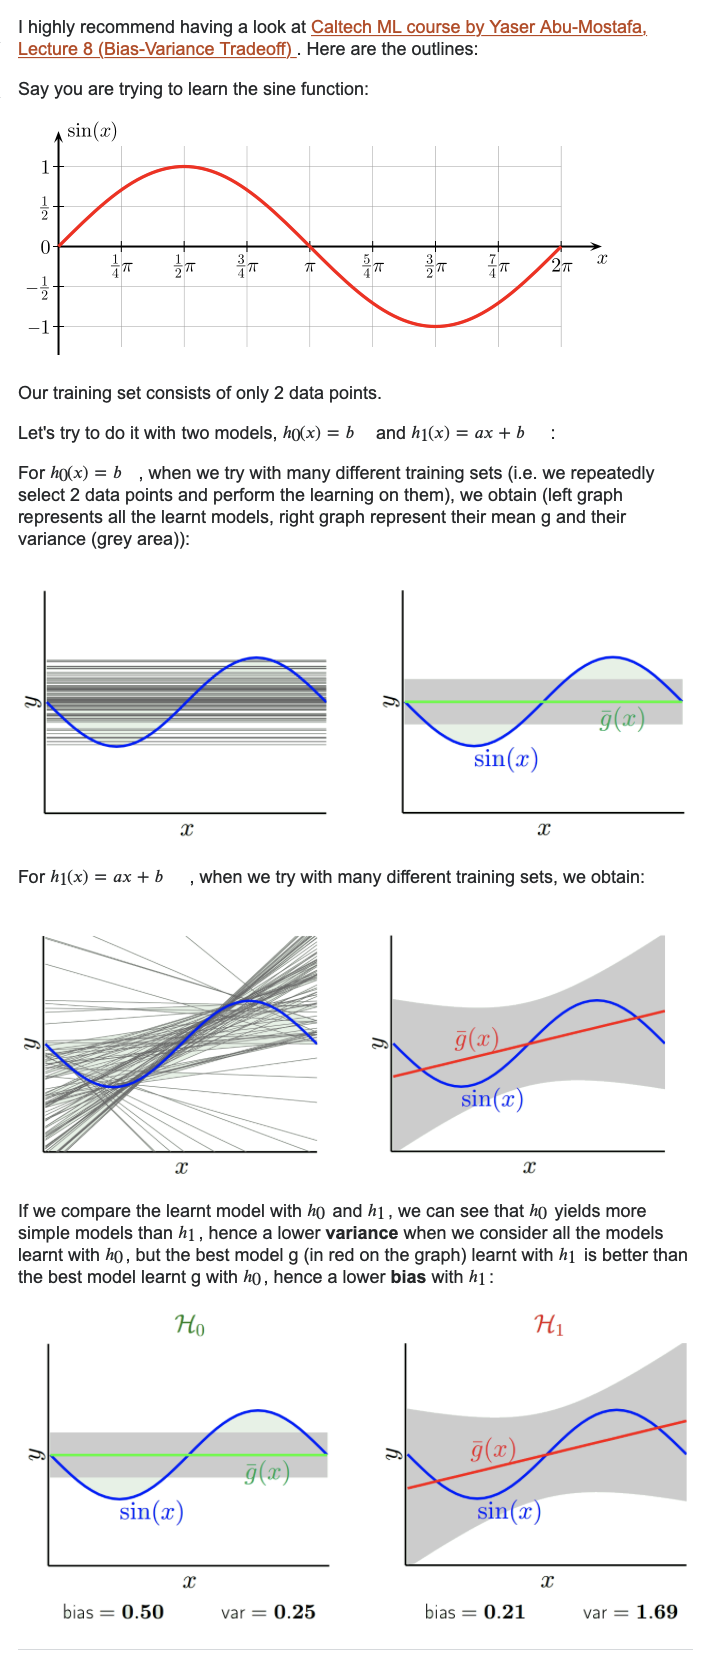

In [93]:
Image(filename='td4_ressources/img_biais_variance.png')

/Users/lucbertin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/lucbertin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lucbertin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lucbertin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: 

Text(0.5,1,'Boostrap procedure to assess model stability')

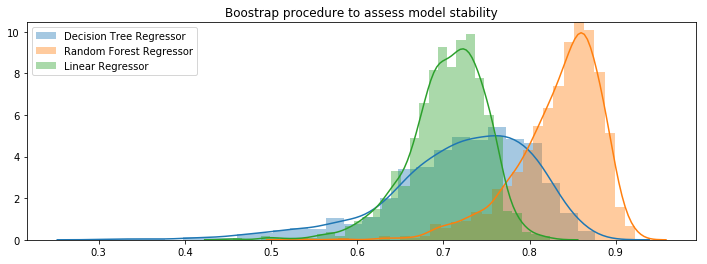

In [85]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=1)
sns.distplot(scores_decision_trees, ax=ax)
sns.distplot(scores_rf, ax=ax)
sns.distplot(scores_linear_regression_OLS, ax=ax)
plt.legend(["Decision Tree Regressor", "Random Forest Regressor", "Linear Regressor"])
plt.title("Boostrap procedure to assess model stability")
#sns.distplot(scores_elasticnet, ax=ax)

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
def grid_search_best_score(algorithme, hyperparametres):
    from sklearn.grid_search import GridSearchCV
    grid = GridSearchCV(algorithme, param_grid=hyperparametres, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train)
    return grid.best_score_, grid.best_estimator_

In [ ]:
hyperparametres = {'alpha':[1.0], 'l1_ratio':[0.5]}
grid_search_best_score(ElasticNet(), hyperparametres)

In [ ]:
hyperparametres = {'alpha':np.linspace(0.1,0.9,50), 'l1_ratio':np.linspace(0.1,0.9,50)}
grid_search_best_score(ElasticNet(), hyperparametres)

In [ ]:
hyperparametres = {'alpha':np.linspace(0.01,0.1,10), 'l1_ratio':np.linspace(0.01,0.1,10)}
grid_search_best_score(ElasticNet(), hyperparametres)

In [ ]:
hyperparametres = {'alpha':np.linspace(0.025, 0.035,10), 'l1_ratio':[0.001]}
grid_search_best_score(ElasticNet(), hyperparametres)

In [ ]:
np.mean(scores_decision_trees), np.mean(scores_rf)

In [ ]:
np.std(scores_decision_trees), np.std(scores_rf)

# Fin.